# Introduction

#### Our Plantix Partner app allows Retailers to order supplies online. We are continuously working on optimizing the app.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read Tables

In [2]:
login_logs=pd.read_csv("C:/Users/aspire 5/Downloads/Plantix_Case_Study_-_Data_Analyst_B2B/login_logs.csv",parse_dates=['login_time'])
sales_orders=pd.read_csv("C:/Users/aspire 5/Downloads/Plantix_Case_Study_-_Data_Analyst_B2B/sales_orders.csv",parse_dates=['creation_time'])
sales_orders_items=pd.read_csv("C:/Users/aspire 5/Downloads/Plantix_Case_Study_-_Data_Analyst_B2B/sales_orders_items.csv")

## Dataframe Info

In [3]:
display(login_logs.info())
display(sales_orders.info())
display(sales_orders_items.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666357 entries, 0 to 666356
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   login_log_id  666357 non-null  int64         
 1   user_id       666357 non-null  int64         
 2   login_time    666357 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 15.3 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13630 entries, 0 to 13629
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            13630 non-null  int64         
 1   fk_buyer_id         13630 non-null  int64         
 2   fk_depot_id         13630 non-null  int64         
 3   sales_order_status  13630 non-null  object        
 4   creation_time       13630 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 532.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20488 entries, 0 to 20487
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_item_id            20488 non-null  int64  
 1   fk_product_id            20488 non-null  int64  
 2   fk_order_id              20488 non-null  int64  
 3   ordered_quantity         20488 non-null  int64  
 4   order_quantity_accepted  20488 non-null  int64  
 5   rate                     20488 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 960.5 KB


None

## DF Description

In [4]:
display(login_logs.describe())
display(sales_orders.describe())
display(sales_orders_items.describe())

,login_log_id,user_id
count,6.663570e+05,666357.000000
mean,3.271343e+06,111582.011252
std,1.453791e+06,63061.193491
min,1.385328e+06,972.000000
25%,1.551917e+06,59852.000000
50%,4.337335e+06,96976.000000
75%,4.503924e+06,166324.000000
max,4.670513e+06,225716.000000


,order_id,fk_buyer_id,fk_depot_id
count,13630.000000,13630.000000,13630.000000
mean,226375.926559,101658.050770,4.725459
std,89185.597078,60965.161791,3.385547
min,119874.000000,996.000000,1.000000
25%,130095.750000,53976.000000,1.000000
50%,298528.500000,87884.000000,4.000000
75%,308750.250000,143200.000000,8.000000
max,318972.000000,225684.000000,12.000000


,order_item_id,fk_product_id,fk_order_id,ordered_quantity,order_quantity_accepted,rate
count,20488.000000,20488.000000,20488.000000,20488.000000,20488.000000,20488.000000
mean,111618.299688,8685.166878,222065.659850,3.252538,1.453827,6322.258606
std,42437.427111,3478.256921,89401.468387,14.690323,6.486877,5470.559975
min,62609.000000,335.000000,119874.000000,1.000000,0.000000,1.000000
25%,67730.750000,7860.000000,129564.000000,1.000000,0.000000,3041.750000
50%,147344.500000,8773.500000,297574.500000,1.000000,0.000000,4894.000000
75%,152466.250000,11131.000000,308100.000000,2.000000,1.000000,7924.000000
max,157588.000000,14469.000000,318972.000000,999.000000,500.000000,162500.000000


## Check Null Vales

In [5]:
display(login_logs.isna().sum())
display(sales_orders.isna().sum())
display(sales_orders_items.isna().sum())

login_log_id    0
user_id         0
login_time      0
dtype: int64

order_id              0
fk_buyer_id           0
fk_depot_id           0
sales_order_status    0
creation_time         0
dtype: int64

order_item_id              0
fk_product_id              0
fk_order_id                0
ordered_quantity           0
order_quantity_accepted    0
rate                       0
dtype: int64

## Check DF

In [6]:
display(login_logs)
display(sales_orders)
display(sales_orders_items)

,login_log_id,user_id,login_time
0,1385328,99160,2021-01-07 00:00:00
1,1385329,83272,2021-01-07 00:00:00
2,1385330,83272,2021-01-07 00:00:00
3,1385331,96640,2021-01-07 00:02:00
4,1385332,99160,2021-01-07 00:02:00
...,...,...,...
666352,4670509,207632,2022-07-30 23:47:00
666353,4670510,207632,2022-07-30 23:49:00
666354,4670511,207632,2022-07-30 23:49:00
666355,4670512,111788,2022-07-30 23:51:00


,order_id,fk_buyer_id,fk_depot_id,sales_order_status,creation_time
0,119874,82228,5,Rejected,2021-07-01 00:35:28
1,119877,40476,1,Rejected,2021-07-01 02:02:43
2,119880,41728,8,Shipped,2021-07-01 02:42:12
3,119883,97616,4,Rejected,2021-07-01 02:56:00
4,119886,12440,1,Rejected,2021-07-01 03:11:31
...,...,...,...,...,...
13625,318960,63380,10,Rejected,2022-07-30 16:02:58
13626,318963,69544,5,Rejected,2022-07-30 16:30:26
13627,318966,167048,1,Shipped,2022-07-30 16:57:31
13628,318969,122360,2,Rejected,2022-07-30 17:53:54


,order_item_id,fk_product_id,fk_order_id,ordered_quantity,order_quantity_accepted,rate
0,62609,7818,119874,1,0,4993.00
1,62610,7607,119877,1,0,6203.40
2,62611,9916,119880,2,2,2904.41
3,62612,11118,119880,2,2,2205.00
4,62613,12702,119880,2,2,2200.85
...,...,...,...,...,...,...
20483,157584,10975,318966,1,1,12632.00
20484,157585,10975,318966,1,0,11814.00
20485,157586,10975,318966,1,1,10110.00
20486,157587,3284,318969,1,0,5271.00


## 1. Which KPIs would you use to measure the performance of our app?
### We can use following KPIs:
### user_id - to check user growth 
### order_id, sales_order_status, rate to get the growth of the business

## 2. Prepare a report regarding our growth between the 2 years. 

Growth of overall user in Percentage: 45.7%


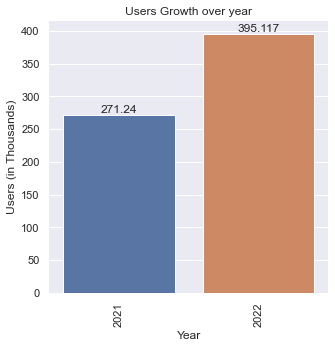

In [7]:
login_logs['year'] = pd.to_datetime(login_logs['login_time']).dt.year
user_growth_year=login_logs.groupby('year').agg({ 'user_id': 'count'}).reset_index()
user_growth_year['user_id']=user_growth_year['user_id']/1000
sns.set()
fig,ax= plt.subplots(figsize=(5,5))
sns.barplot(data=user_growth_year, y="user_id", x="year").set(title="Users Growth over year")
ax.set( ylabel="Users (in Thousands)",  xlabel="Year")
ax.bar_label(ax.containers[0])
sns.despine(left=True, bottom=True)
plt.xticks(rotation=90)
print(f"Growth of overall user in Percentage: {((user_growth_year['user_id'][1]-user_growth_year['user_id'][0])/user_growth_year['user_id'][0])*100:.3g}%")
plt.show()

In [8]:
no_unique_user_2021=login_logs[login_logs['year']==2021]['user_id'].nunique()
no_unique_user_2022=login_logs[login_logs['year']==2022]['user_id'].nunique()
unique_user_growth_=((no_unique_user_2022-no_unique_user_2021)/no_unique_user_2021)*100
unique_user_growth=(no_unique_user_2022-no_unique_user_2021)

In [9]:
print(f'''Unique Users in 2021 : {no_unique_user_2021}
Unique Users in 2022 : {no_unique_user_2022}
Growth in Nos : {unique_user_growth}
Growth in % : {unique_user_growth_:.3g}%''')

Unique Users in 2021 : 10867
Unique Users in 2022 : 13022
Growth in Nos : 2155
Growth in % : 19.8%



## a. Did our business grow?
ans: yes , the overall business has grown around 47.5%

## b. Does our app perform better now?
ans: yes, and as per the increased login time by every user, we can see that the app is performing better now

## c. Did our user base grow?
ans: yes , the growth of user base as compare to previous year has now increase by 19.8%.

## 3. What are our top-selling products in each of the two years? Can you draw some insight from this?

In [10]:
sales_orders_items

,order_item_id,fk_product_id,fk_order_id,ordered_quantity,order_quantity_accepted,rate
0,62609,7818,119874,1,0,4993.00
1,62610,7607,119877,1,0,6203.40
2,62611,9916,119880,2,2,2904.41
3,62612,11118,119880,2,2,2205.00
4,62613,12702,119880,2,2,2200.85
...,...,...,...,...,...,...
20483,157584,10975,318966,1,1,12632.00
20484,157585,10975,318966,1,0,11814.00
20485,157586,10975,318966,1,1,10110.00
20486,157587,3284,318969,1,0,5271.00


In [11]:
sales_orders_items['sale']=sales_orders_items['order_quantity_accepted']*sales_orders_items['rate']

In [12]:
sales_orders_items

,order_item_id,fk_product_id,fk_order_id,ordered_quantity,order_quantity_accepted,rate,sale
0,62609,7818,119874,1,0,4993.00,0.00
1,62610,7607,119877,1,0,6203.40,0.00
2,62611,9916,119880,2,2,2904.41,5808.82
3,62612,11118,119880,2,2,2205.00,4410.00
4,62613,12702,119880,2,2,2200.85,4401.70
...,...,...,...,...,...,...,...
20483,157584,10975,318966,1,1,12632.00,12632.00
20484,157585,10975,318966,1,0,11814.00,0.00
20485,157586,10975,318966,1,1,10110.00,10110.00
20486,157587,3284,318969,1,0,5271.00,0.00


In [13]:
sales_product=pd.merge(sales_orders_items,sales_orders,right_on='order_id',left_on='fk_order_id',how='left')
sales_product['year'] = pd.to_datetime(sales_product['creation_time']).dt.year

In [14]:
sales_product

,order_item_id,fk_product_id,fk_order_id,ordered_quantity,order_quantity_accepted,rate,sale,order_id,fk_buyer_id,fk_depot_id,sales_order_status,creation_time,year
0,62609,7818,119874,1,0,4993.00,0.00,119874,82228,5,Rejected,2021-07-01 00:35:28,2021
1,62610,7607,119877,1,0,6203.40,0.00,119877,40476,1,Rejected,2021-07-01 02:02:43,2021
2,62611,9916,119880,2,2,2904.41,5808.82,119880,41728,8,Shipped,2021-07-01 02:42:12,2021
3,62612,11118,119880,2,2,2205.00,4410.00,119880,41728,8,Shipped,2021-07-01 02:42:12,2021
4,62613,12702,119880,2,2,2200.85,4401.70,119880,41728,8,Shipped,2021-07-01 02:42:12,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20483,157584,10975,318966,1,1,12632.00,12632.00,318966,167048,1,Shipped,2022-07-30 16:57:31,2022
20484,157585,10975,318966,1,0,11814.00,0.00,318966,167048,1,Shipped,2022-07-30 16:57:31,2022
20485,157586,10975,318966,1,1,10110.00,10110.00,318966,167048,1,Shipped,2022-07-30 16:57:31,2022
20486,157587,3284,318969,1,0,5271.00,0.00,318969,122360,2,Rejected,2022-07-30 17:53:54,2022


In [15]:
pro_growth=sales_product.groupby(['year','fk_product_id']).agg({ 'sale': 'sum'}).reset_index()
pro_growth

,year,fk_product_id,sale
0,2021,335,0.00
1,2021,360,0.00
2,2021,398,0.00
3,2021,529,3300.00
4,2021,1038,1275489.12
...,...,...,...
1032,2022,14443,0.00
1033,2022,14446,0.00
1034,2022,14449,0.00
1035,2022,14454,23059.00


In [16]:
pro_growth.sort_values(by=['year','sale'],ascending=False)

,year,fk_product_id,sale
899,2022,12547,9716031.0
579,2022,3610,9520258.0
665,2022,8219,9163587.0
732,2022,8444,6982455.0
627,2022,7640,6508070.0
...,...,...,...
534,2021,12778,0.0
542,2021,12806,0.0
545,2021,12856,0.0
546,2021,12882,0.0


In [17]:
pro_growth.loc[pro_growth['year']==2021].sort_values(by=['year','sale'],ascending=False).head(10)

,year,fk_product_id,sale
184,2021,8219,11337874.30
180,2021,8210,5328288.50
103,2021,7640,2696077.60
10,2021,1548,2563695.52
384,2021,10975,2353035.30
337,2021,9925,1794376.67
40,2021,3610,1720389.00
359,2021,10235,1415069.45
244,2021,8444,1388173.40
4,2021,1038,1275489.12


In [18]:
dfs=[pro_growth.loc[pro_growth['year']==2021].sort_values(by=['year','sale'],ascending=False).head(10),pro_growth.loc[pro_growth['year']==2022].sort_values(by=['year','sale'],ascending=False).head(10)]

In [19]:
top_prod=pd.concat(dfs)
top_prod['sale']=top_prod['sale']/100000
top_prod=top_prod.round(1)

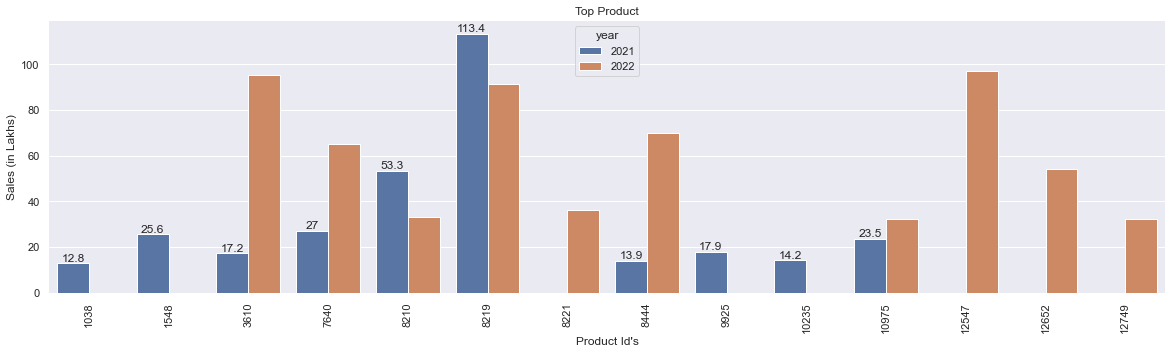

In [20]:
sns.set()
fig,ax= plt.subplots(figsize=(20,5))
sns.barplot(data=top_prod, y="sale", x="fk_product_id", hue='year').set(title="Top Product")
ax.set( ylabel="Sales (in Lakhs)",  xlabel="Product Id's")
ax.bar_label(ax.containers[0])
sns.despine(left=True, bottom=True)
plt.xticks(rotation=90)
plt.show()

## 4. Looking at July 2021 data, what do you think is our biggest problem and how would you recommend fixing it?

In [21]:
july2021 = sales_orders.iloc[0:6216, 0:]
count2021 = dict(july2021["sales_order_status"].value_counts())
count2021

{'Rejected': 3764, 'Shipped': 2434, 'Pending': 18}

In [22]:
july2022 = sales_orders.iloc[6218: , 0:]
count2022 = dict(july2022["sales_order_status"].value_counts())
count2022

{'Rejected': 3898, 'Shipped': 3488, 'Pending': 25, 'Review': 1}

In [23]:
rsdata = pd.DataFrame([count2021 , count2022])
rsdata.insert(0 , "year" , [2021 , 2022] )
rsdata

,year,Rejected,Shipped,Pending,Review
0,2021,3764,2434,18,NaN
1,2022,3898,3488,25,1.0


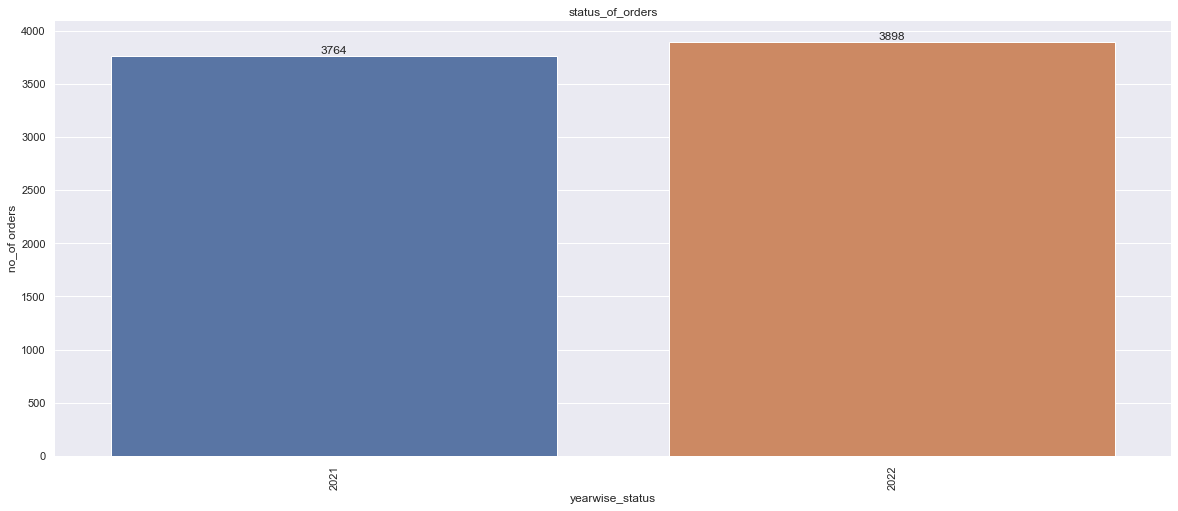

In [24]:
sns.set()
fig,ax= plt.subplots(figsize=(20,8))
sns.barplot(data= rsdata, y="Rejected", x="year" ).set(title="status_of_orders")
ax.set( ylabel="no_of orders",  xlabel="yearwise_status")
ax.bar_label(ax.containers[0])
sns.despine(left=True, bottom=True)
plt.xticks(rotation=90)
plt.show()

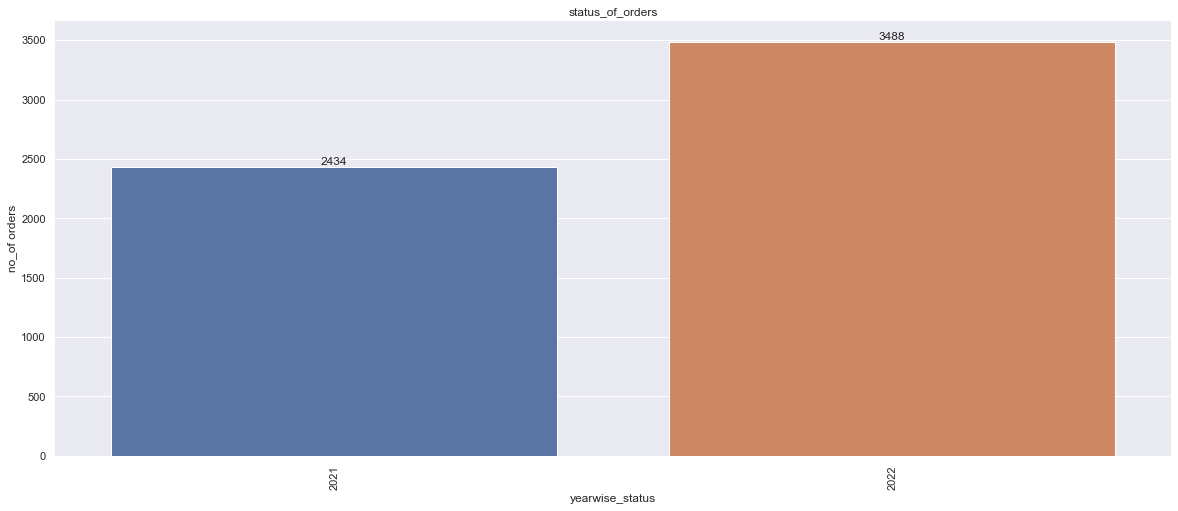

In [31]:
sns.set()
fig,ax= plt.subplots(figsize=(20,8))
sns.barplot(data= rsdata, y="Shipped", x="year" ).set(title="status_of_orders")
ax.set( ylabel="no_of orders",  xlabel="yearwise_status")
ax.bar_label(ax.containers[0])
sns.despine(left=True, bottom=True)
plt.xticks(rotation=90)
plt.show()

## 5. Does the login frequency affect the number of orders made?

In [26]:
sales_product=pd.merge(sales_orders_items,sales_orders,right_on='order_id',left_on='fk_order_id',how='left')

In [27]:
frequency = pd.merge(sales_product , login_logs , right_on = 'user_id' , left_on = 'fk_buyer_id' , how = 'left')
frequency.head()

,order_item_id,fk_product_id,fk_order_id,ordered_quantity,order_quantity_accepted,rate,sale,order_id,fk_buyer_id,fk_depot_id,sales_order_status,creation_time,login_log_id,user_id,login_time,year
0,62609,7818,119874,1,0,4993.0,0.0,119874,82228,5,Rejected,2021-07-01 00:35:28,1385357,82228,2021-01-07 00:34:00,2021
1,62609,7818,119874,1,0,4993.0,0.0,119874,82228,5,Rejected,2021-07-01 00:35:28,1385358,82228,2021-01-07 00:35:00,2021
2,62609,7818,119874,1,0,4993.0,0.0,119874,82228,5,Rejected,2021-07-01 00:35:28,1385360,82228,2021-01-07 00:36:00,2021
3,62609,7818,119874,1,0,4993.0,0.0,119874,82228,5,Rejected,2021-07-01 00:35:28,1385361,82228,2021-01-07 00:37:00,2021
4,62609,7818,119874,1,0,4993.0,0.0,119874,82228,5,Rejected,2021-07-01 00:35:28,1385362,82228,2021-01-07 00:37:00,2021


In [28]:
frequency['date'] = frequency['login_time'].dt.date
frequency['time'] = frequency['login_time'].dt.time

In [32]:
frequency

,order_item_id,fk_product_id,fk_order_id,ordered_quantity,order_quantity_accepted,rate,sale,order_id,fk_buyer_id,fk_depot_id,sales_order_status,creation_time,login_log_id,user_id,login_time,year,date,time
0,62609,7818,119874,1,0,4993.0,0.0,119874,82228,5,Rejected,2021-07-01 00:35:28,1385357,82228,2021-01-07 00:34:00,2021,2021-01-07,00:34:00
1,62609,7818,119874,1,0,4993.0,0.0,119874,82228,5,Rejected,2021-07-01 00:35:28,1385358,82228,2021-01-07 00:35:00,2021,2021-01-07,00:35:00
2,62609,7818,119874,1,0,4993.0,0.0,119874,82228,5,Rejected,2021-07-01 00:35:28,1385360,82228,2021-01-07 00:36:00,2021,2021-01-07,00:36:00
3,62609,7818,119874,1,0,4993.0,0.0,119874,82228,5,Rejected,2021-07-01 00:35:28,1385361,82228,2021-01-07 00:37:00,2021,2021-01-07,00:37:00
4,62609,7818,119874,1,0,4993.0,0.0,119874,82228,5,Rejected,2021-07-01 00:35:28,1385362,82228,2021-01-07 00:37:00,2021,2021-01-07,00:37:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3396785,157588,8421,318972,1,1,4714.0,4714.0,318972,190076,9,Shipped,2022-07-30 18:17:49,4669240,190076,2022-07-30 15:17:00,2022,2022-07-30,15:17:00
3396786,157588,8421,318972,1,1,4714.0,4714.0,318972,190076,9,Shipped,2022-07-30 18:17:49,4669628,190076,2022-07-30 16:06:00,2022,2022-07-30,16:06:00
3396787,157588,8421,318972,1,1,4714.0,4714.0,318972,190076,9,Shipped,2022-07-30 18:17:49,4670357,190076,2022-07-30 18:13:00,2022,2022-07-30,18:13:00
3396788,157588,8421,318972,1,1,4714.0,4714.0,318972,190076,9,Shipped,2022-07-30 18:17:49,4670369,190076,2022-07-30 18:17:00,2022,2022-07-30,18:17:00
